In [57]:
import os
import sys

In [58]:
sys.path.append(os.path.abspath("../.."))

In [59]:
from analysis.preprocessing import load_and_clean_microplastic_data, load_and_clean_macroplastic_data, load_and_clean_plastic_waste_data, load_and_clean_plastic_waste_ocean_data, load_and_clean_plastic_production_data
from analysis.config import PROCESSED_DATA_FILES

In [60]:
df_micro = load_and_clean_microplastic_data()
df_micro

,Entity,Code,year,microplastics
0,Emissions growth to 2050,NaN,1950,0
1,Emissions growth to 2050,NaN,1951,0
2,Emissions growth to 2050,NaN,1952,0
3,Emissions growth to 2050,NaN,1953,0
4,Emissions growth to 2050,NaN,1954,100
...,...,...,...,...
298,Emissions stop in 2020,NaN,2046,1380100
299,Emissions stop in 2020,NaN,2047,1405000
300,Emissions stop in 2020,NaN,2048,1429400
301,Emissions stop in 2020,NaN,2049,1453500


In [61]:
df_macro = load_and_clean_macroplastic_data()
df_macro

,Entity,Code,year,macroplastics
0,Emissions growth to 2050,NaN,1950,0
1,Emissions growth to 2050,NaN,1951,400
2,Emissions growth to 2050,NaN,1952,600
3,Emissions growth to 2050,NaN,1953,1000
4,Emissions growth to 2050,NaN,1954,1300
...,...,...,...,...
298,Emissions stop in 2020,NaN,2046,827100
299,Emissions stop in 2020,NaN,2047,815000
300,Emissions stop in 2020,NaN,2048,802800
301,Emissions stop in 2020,NaN,2049,790700


In [62]:
df_macro.drop(columns="Code", inplace=True)
df_micro.drop(columns="Code", inplace=True)

In [63]:
df_platics = df_micro.merge(df_macro, on=['Entity', 'year'], how='inner', suffixes=('', '_macro'))
df_platics

,Entity,year,microplastics,macroplastics
0,Emissions growth to 2050,1950,0,0
1,Emissions growth to 2050,1951,0,400
2,Emissions growth to 2050,1952,0,600
3,Emissions growth to 2050,1953,0,1000
4,Emissions growth to 2050,1954,100,1300
...,...,...,...,...
298,Emissions stop in 2020,2046,1380100,827100
299,Emissions stop in 2020,2047,1405000,815000
300,Emissions stop in 2020,2048,1429400,802800
301,Emissions stop in 2020,2049,1453500,790700


In [64]:
df_platics.to_csv(PROCESSED_DATA_FILES['plastics'])

In [65]:
import matplotlib.pyplot as plt
import seaborn as sns

# Configuration des graphiques
plt.rcParams['figure.figsize'] = (12, 8)
sns.set_style("whitegrid")


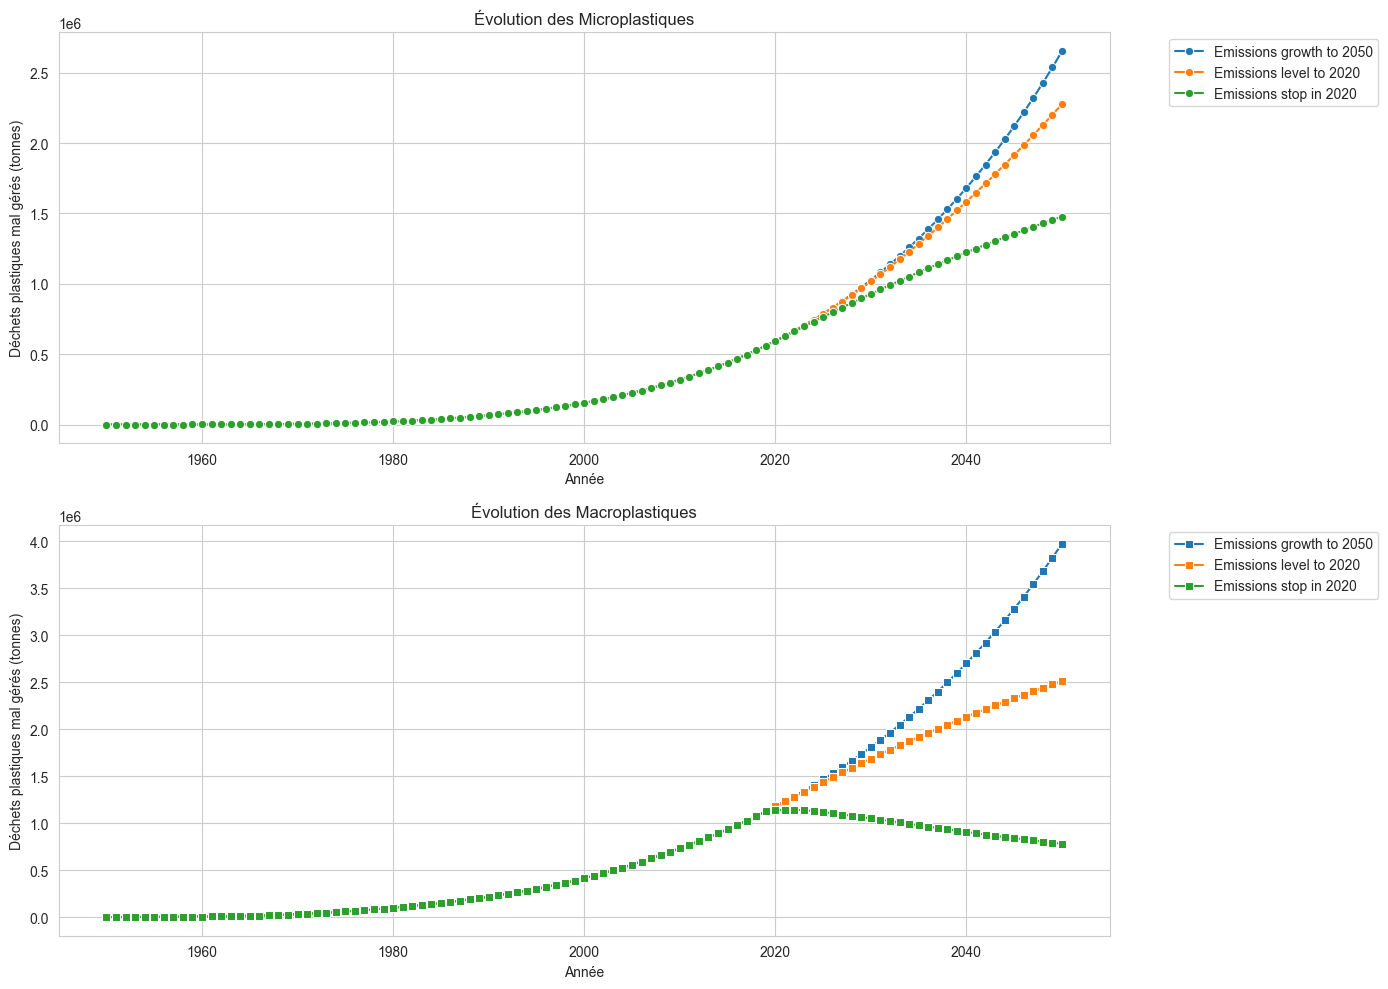

In [66]:
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(14, 10))

# Microplastiques
sns.lineplot(data=df_platics, x='year', y='microplastics',
             hue='Entity', ax=ax1, marker='o')
ax1.set_title('Évolution des Microplastiques')
ax1.set_xlabel('Année')
ax1.set_ylabel('Déchets plastiques mal gérés (tonnes)')
ax1.legend(bbox_to_anchor=(1.05, 1), loc='upper left')

# Macroplastiques
sns.lineplot(data=df_platics, x='year', y='macroplastics',
             hue='Entity', ax=ax2, marker='s')
ax2.set_title('Évolution des Macroplastiques')
ax2.set_xlabel('Année')
ax2.set_ylabel('Déchets plastiques mal gérés (tonnes)')
ax2.legend(bbox_to_anchor=(1.05, 1), loc='upper left')

plt.tight_layout()
plt.show()

In [67]:
df_plastic_waste = load_and_clean_plastic_waste_data()
df_plastic_waste

,Entity,Year,Imports of plastic waste via all modes of transport
0,Afghanistan,2019,13905.0180
1,Africa,1991,24.8810
2,Africa,1992,97.7520
3,Africa,1993,594.4330
4,Africa,1994,2112.1470
...,...,...,...
5007,Zimbabwe,2020,2021.4100
5008,Zimbabwe,2021,1722.7428
5009,Zimbabwe,2022,2095.7020
5010,Zimbabwe,2023,2710.4080


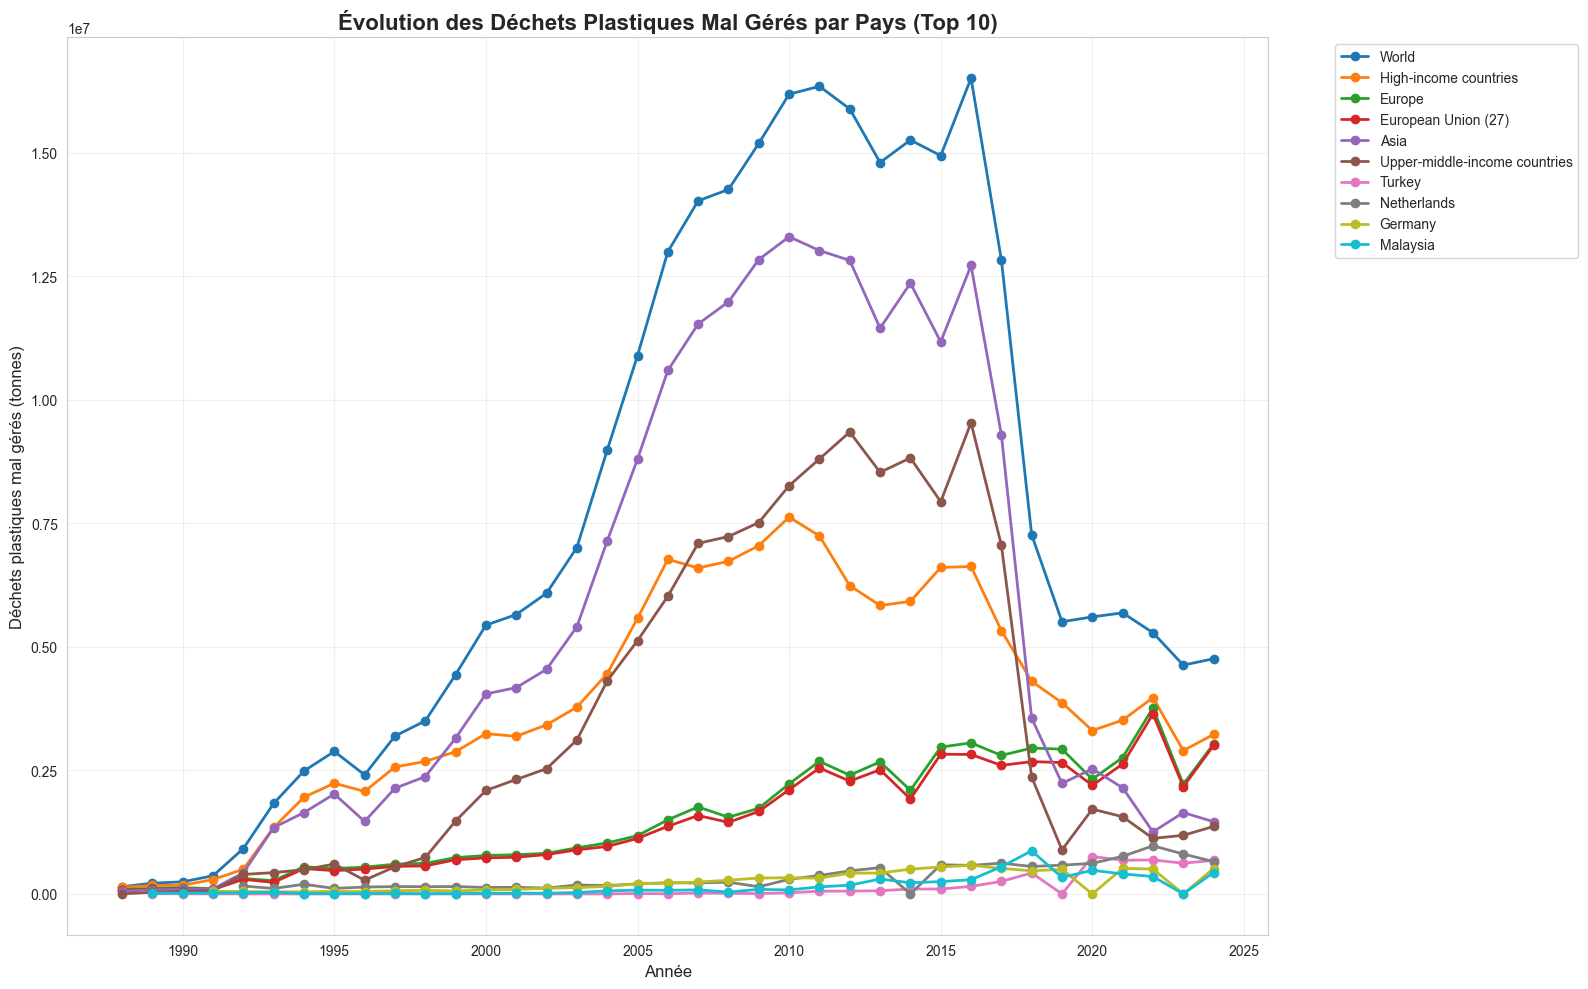

In [68]:
plt.figure(figsize=(16, 10))

latest_year = df_plastic_waste['Year'].max()
top_countries = df_plastic_waste[df_plastic_waste['Year'] == latest_year].nlargest(10, 'Imports of plastic waste via all modes of transport')

for country in top_countries['Entity'].values:
    country_data = df_plastic_waste[df_plastic_waste['Entity'] == country]
    plt.plot(country_data['Year'], country_data['Imports of plastic waste via all modes of transport'],
             marker='o', linewidth=2, label=country)

plt.title('Évolution des Déchets Plastiques Mal Gérés par Pays (Top 10)', fontsize=16, fontweight='bold')
plt.xlabel('Année', fontsize=12)
plt.ylabel('Déchets plastiques mal gérés (tonnes)', fontsize=12)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

In [69]:
df_plastic_production = load_and_clean_plastic_production_data()
df_plastic_production


,Entity,Code,Year,plastic_production
0,World,OWID_WRL,1950,2000000
1,World,OWID_WRL,1951,2000000
2,World,OWID_WRL,1952,2000000
3,World,OWID_WRL,1953,3000000
4,World,OWID_WRL,1954,3000000
...,...,...,...,...
64,World,OWID_WRL,2015,381000000
65,World,OWID_WRL,2016,400050000
66,World,OWID_WRL,2017,420052500
67,World,OWID_WRL,2018,441055125


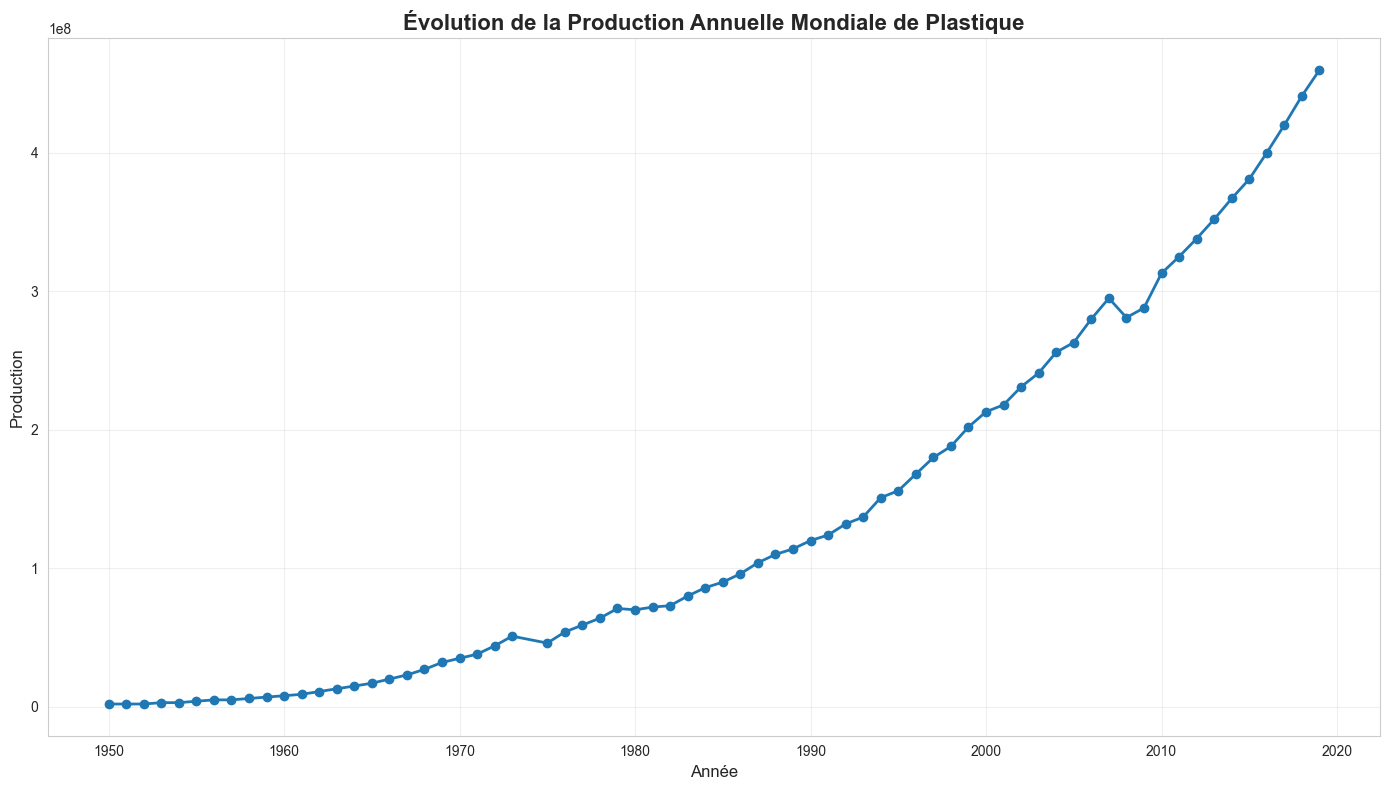

In [70]:
plt.figure(figsize=(14, 8))

production_annuelle = df_plastic_production.groupby('Year')['plastic_production'].sum().reset_index()

plt.plot(production_annuelle['Year'], production_annuelle['plastic_production'],
         marker='o', linewidth=2, markersize=6)
plt.title('Évolution de la Production Annuelle Mondiale de Plastique', fontsize=16, fontweight='bold')
plt.xlabel('Année', fontsize=12)
plt.ylabel('Production', fontsize=12)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()


In [71]:
df_plastic_waste_ocean = load_and_clean_plastic_waste_ocean_data()
df_plastic_waste_ocean

,Entity,Code,Year,Share of global plastics emitted to ocean
0,Africa,NaN,2019,7.989317
1,Albania,ALB,2019,0.159782
2,Algeria,DZA,2019,0.589510
3,Angola,AGO,2019,0.087804
4,Antigua and Barbuda,ATG,2019,0.000204
...,...,...,...,...
165,Venezuela,VEN,2019,0.611359
166,Vietnam,VNM,2019,2.881287
167,Western Sahara,ESH,2019,0.003880
168,Yemen,YEM,2019,0.025729


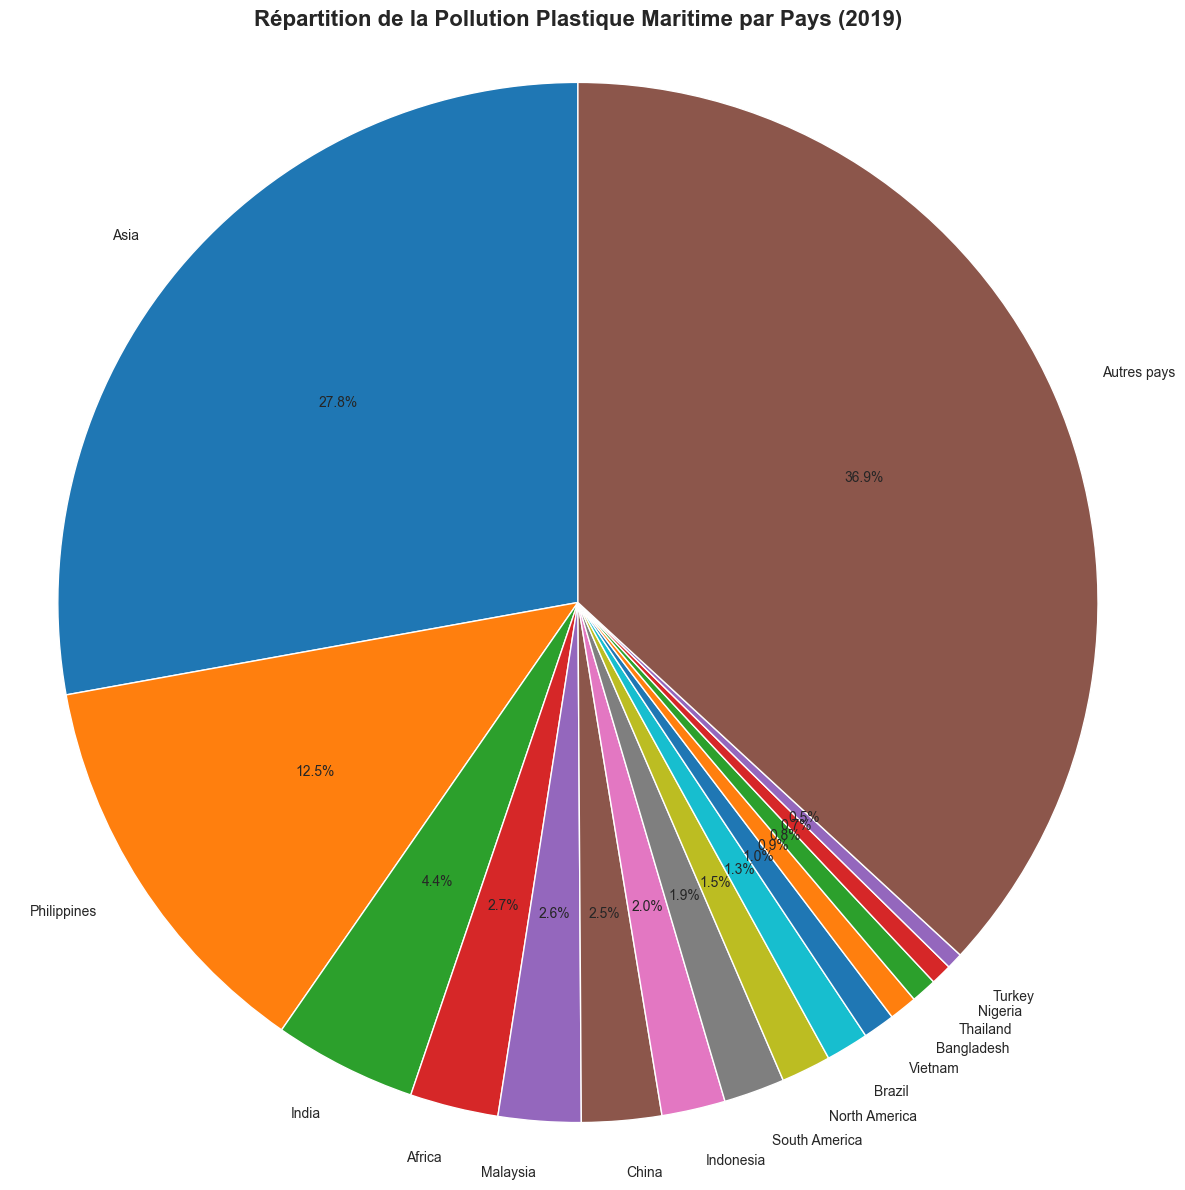

In [73]:
plt.figure(figsize=(12, 12))

top_10_ocean = df_plastic_waste_ocean.nlargest(15, 'Share of global plastics emitted to ocean')
autres = df_plastic_waste_ocean.iloc[15:]['Share of global plastics emitted to ocean'].sum()

# Données pour le camembert
labels = list(top_10_ocean['Entity']) + ['Autres pays']
sizes = list(top_10_ocean['Share of global plastics emitted to ocean']) + [autres]

# Création du camembert
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90)
plt.title('Répartition de la Pollution Plastique Maritime par Pays (2019)',
          fontsize=16, fontweight='bold')
plt.axis('equal')
plt.tight_layout()
plt.show()

